In [15]:
import sys
sys.path.insert(1, '../../eispy2d/library/')

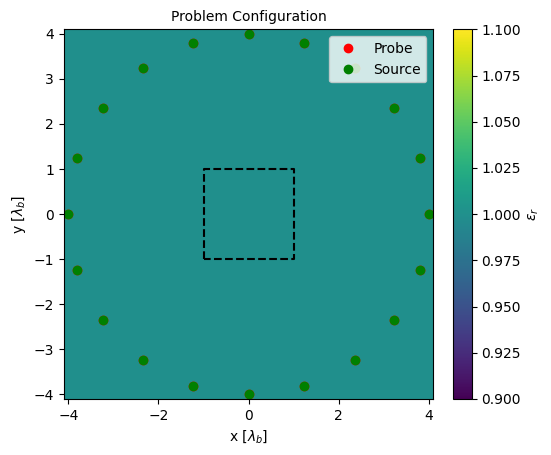

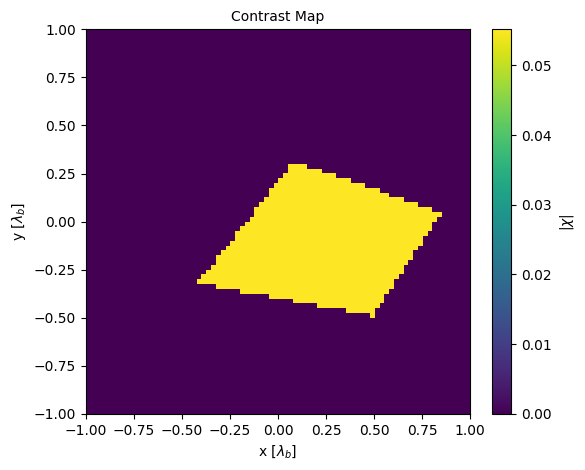

In [28]:
import configuration as cfg

name = 'benchmark.cfg'
NM = NS = 20
Ro = 4.
lambda_b = 1.
epsilon_rb = 1.
Lx = Ly = 2.
E0 = 1.
perfect_dielectric = True

config = cfg.Configuration(name=name, number_measurements=NM, number_sources=NS,
                           observation_radius=Ro, wavelength=lambda_b,
                           background_permittivity=epsilon_rb,
                           image_size=[Ly, Lx], magnitude=E0,
                           perfect_dielectric=perfect_dielectric)

config.draw(show=True)

import testset as tst
name = 'test'
resolution = (80, 80)
map_pattern = 'random_polygons'
contrast = .25
noise = 5.
density_mode = 'single'
object_size = 0.9
object_size_mode = 'fixed'

test = tst.create_input_image('test', config, resolution, map_pattern, contrast,
                              density_mode=density_mode, object_size=object_size,
                              object_size_mode=object_size_mode, noise=noise)

test.draw(show=True)

import mom_cg_fft as mom

forward = mom.MoM_CG_FFT(tolerance=1e-3, maximum_iterations=5000,
                         parallelization=True)
_ = forward.solve(test)

Method: Orthogonality Sampling Method
Alias: osm
Input Data: test
Discretization: Richmond Method (40x40)
Threshold: 0.35


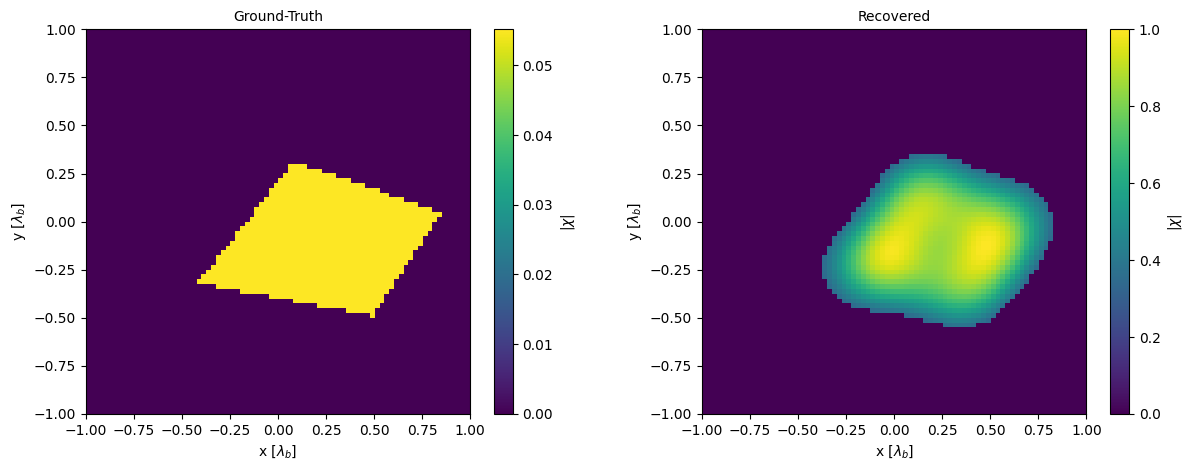

In [29]:
import osm
method = osm.OrthogonalitySamplingMethod(threshold=.35)
import richmond as ric
image = (40, 40)
discretization = ric.Richmond(configuration=config, elements=image)
result = method.solve(test, discretization=discretization)
result.plot_map(show=True, groundtruth=test)

In [10]:
import inputdata as ipt
test = ipt.InputData(import_filename='vary0.ipt')
dir(test)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_configuration',
 'compute_dnl',
 'conductivity',
 'configuration',
 'copy',
 'dnl',
 'draw',
 'importdata',
 'incident_field',
 'indicators',
 'name',
 'noise',
 'plot_scattered_field',
 'plot_total_field',
 'rel_permittivity',
 'resolution',
 'save',
 'scattered_field',
 'total_field']

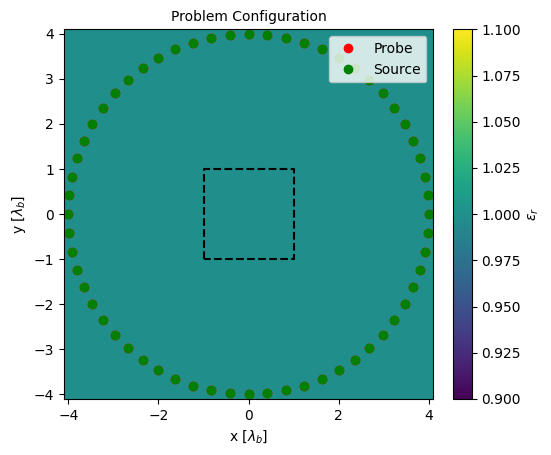

In [3]:
import configuration as cfg

name = 'star.cfg'
NM = NS = 60
Ro = 4.
lambda_b = 1.
epsilon_rb = 1.
Lx = Ly = 2.
E0 = 1.
perfect_dielectric = True

config = cfg.Configuration(name=name, number_measurements=NM, number_sources=NS,
                           observation_radius=Ro, wavelength=lambda_b,
                           background_permittivity=epsilon_rb,
                           image_size=[Ly, Lx], magnitude=E0,
                           perfect_dielectric=perfect_dielectric)

config.draw(show=True)

In [6]:
import inputdata as ipt
import result as rst
import draw

epsilon_rd = [1.25, 1.5, 1.75, 2., 2.5]
name = 'vary'
resolution = (160, 160)
noise = 5.
indicators = [rst.SHAPE_ERROR, rst.POSITION_ERROR]
tests = []

for n in range(len(epsilon_rd)):

    test = ipt.InputData(name=name + '%d' % n + '.ipt', configuration=config,
                         resolution=resolution, noise=noise,
                         indicators=indicators)

    chi = (epsilon_rd[n]-epsilon_rb)/epsilon_rb
    l = 0.9
    position = [.0, .0]

    test.rel_permittivity, _ = draw.star5(
        l, axis_length_x=Lx, axis_length_y=Ly, resolution=resolution,
        background_rel_permittivity=epsilon_rb, 
        object_rel_permittivity=epsilon_rd[n], center=position, rotate=0.
    )
    
    tests.append(test)


In [7]:
import mom_cg_fft as mom

forward = mom.MoM_CG_FFT(tolerance=1e-3, maximum_iterations=5000,
                         parallelization=True)

for n in range(len(epsilon_rd)):
    _ = forward.solve(tests[n])

Method: Orthogonality Sampling Method
Alias: osm
Input Data: vary0.ipt
Discretization: Richmond Method (80x80)
Threshold: 0.35
Method: Orthogonality Sampling Method
Alias: osm
Input Data: vary1.ipt
Discretization: Richmond Method (80x80)
Threshold: 0.35
Method: Orthogonality Sampling Method
Alias: osm
Input Data: vary2.ipt
Discretization: Richmond Method (80x80)
Threshold: 0.35
Method: Orthogonality Sampling Method
Alias: osm
Input Data: vary3.ipt
Discretization: Richmond Method (80x80)
Threshold: 0.35
Method: Orthogonality Sampling Method
Alias: osm
Input Data: vary4.ipt
Discretization: Richmond Method (80x80)
Threshold: 0.35


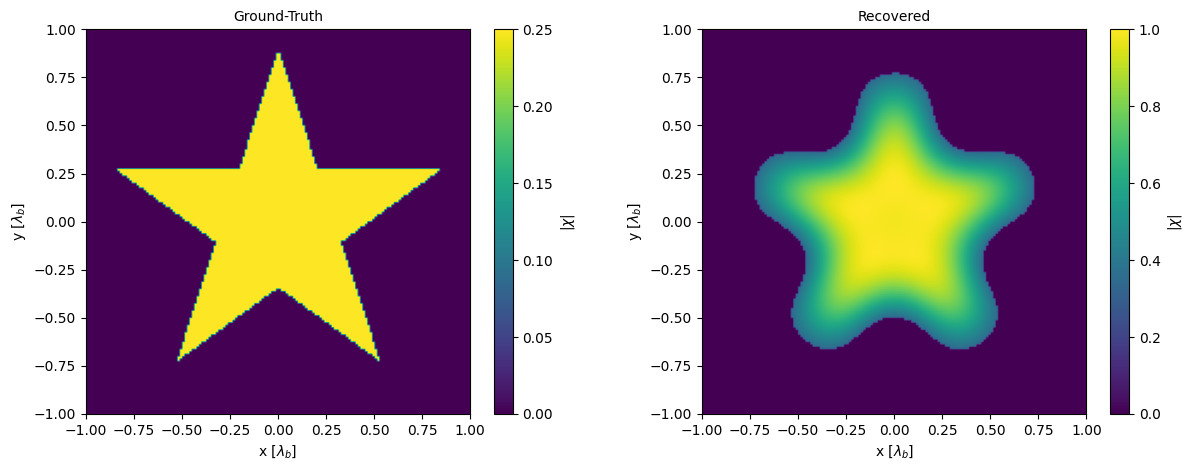

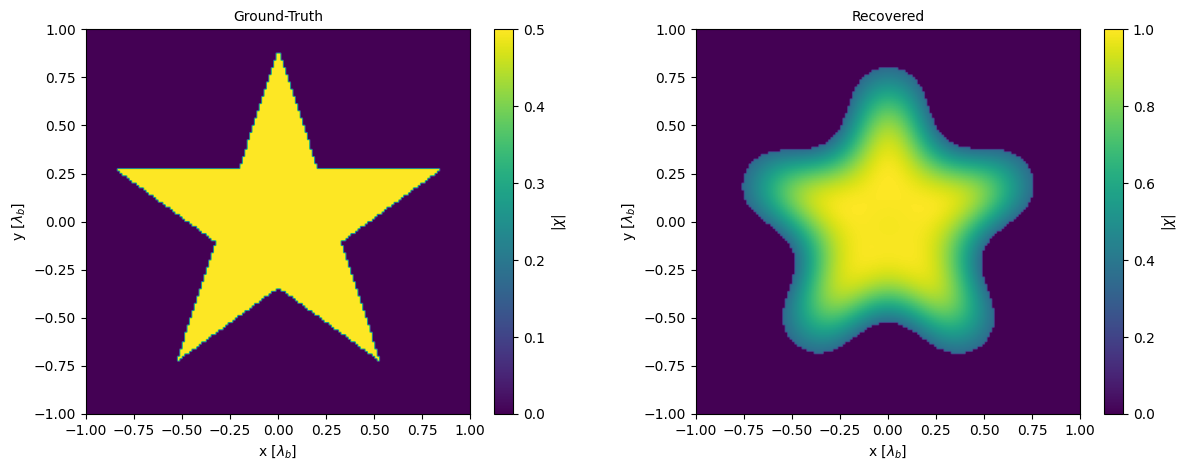

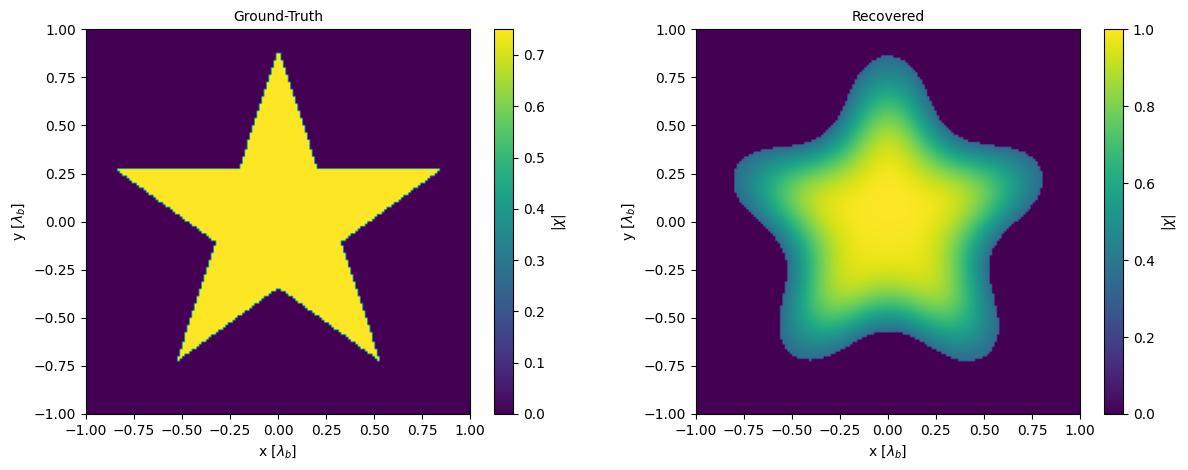

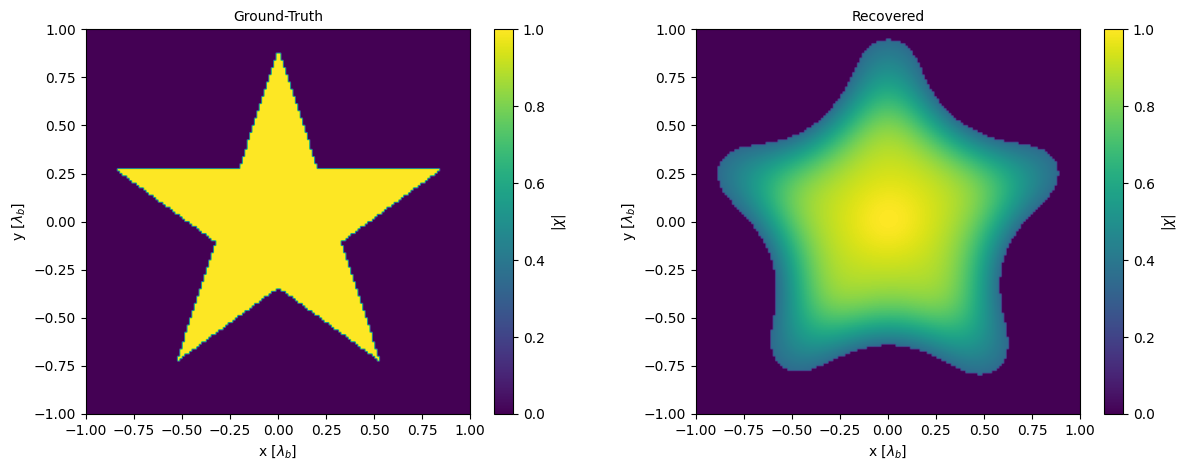

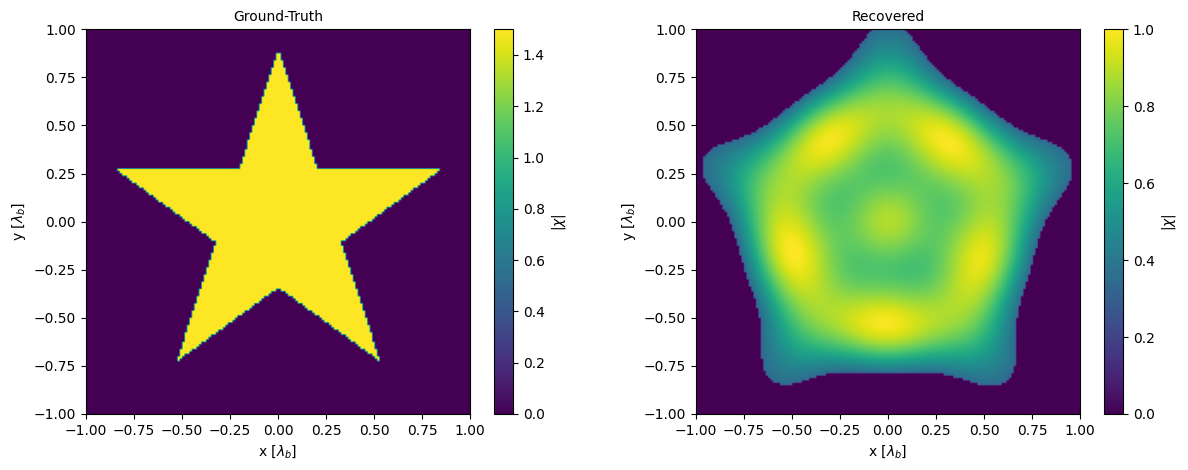

In [10]:
import lsm
import osm
import regularization as reg

regularization = reg.Tikhonov(0.002)
sv_cutoff = None
threshold = .7
alias = 'lsm'

# regularization = reg.Landweber(300)

# regularization = reg.ConjugatedGradient(300)

# method = lsm.LinearSamplingMethod(alias=alias, regularization=regularization,
#                                   sv_cutoff=sv_cutoff, threshold=threshold)

method = osm.OrthogonalitySamplingMethod(threshold=.35)

import richmond as ric

image = (40, 40)

discretization = ric.Richmond(configuration=config, elements=image)

results = []

for n in range(len(epsilon_rd)):
    results.append(method.solve(tests[n], discretization=discretization))

for n in range(len(epsilon_rd)):
    results[n].plot_map(show=True, groundtruth=tests[n])

In [11]:
for n in range(len(epsilon_rd)):
    print(results[n].zeta_s[-1])

25.0
29.942418426103647
36.660268714011515
51.039667306461936
104.52655150351889


Method: Born Iterative Method
Alias: bim
Input Data: star.ipt
Discretization: Richmond Method (40x40)
Method of Moments - CG-FFT (iterations=5000, tolerance=1.0e-03)
Regularization Method: Tikhonov
Choice strategy: fixed
Parameter value: 2.000e-03
Stop Criteria
Maximum number of iterations: 10
Iteration: 1 -  Shape: 18.05, Position: 0.11,
Iteration: 2 -  Shape: 14.51, Position: 0.07,
Iteration: 3 -  Shape: 14.51, Position: 0.47,
Iteration: 4 -  Shape: 14.51, Position: 0.47,
Iteration: 5 -  Shape: 14.51, Position: 0.47,
Iteration: 6 -  Shape: 14.51, Position: 0.47,
Iteration: 7 -  Shape: 14.51, Position: 0.47,
Iteration: 8 -  Shape: 14.51, Position: 0.47,
Iteration: 9 -  Shape: 14.51, Position: 0.47,
Iteration: 10 -  Shape: 14.51, Position: 0.47,


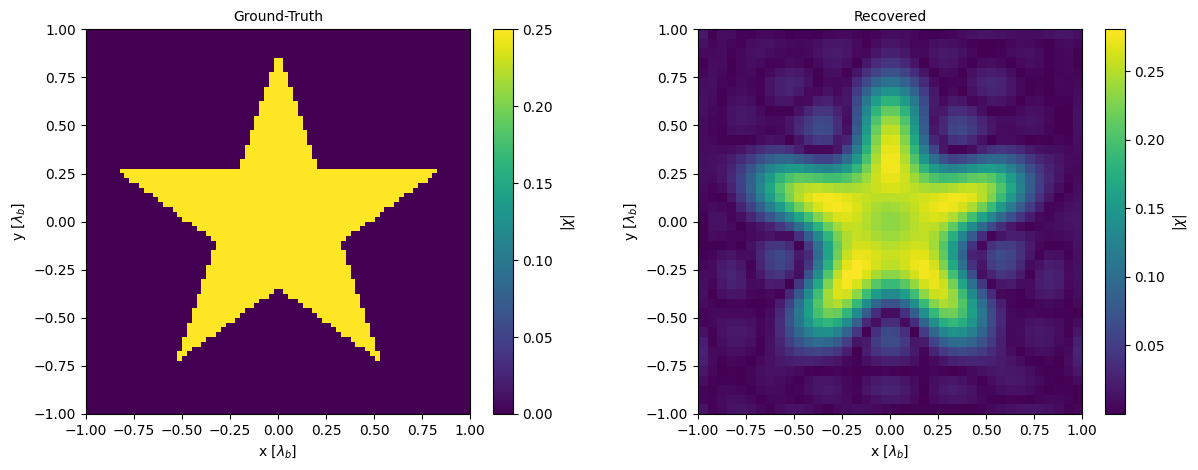

In [7]:
import bim
import stopcriteria as stp

stop_criteria = stp.StopCriteria(max_iterations=30)

# regularization = reg.Tikhonov(0.002)
regularization = reg.ConjugatedGradient(300)

method = bim.BornIterativeMethod(mom.MoM_CG_FFT(), regularization, stop_criteria)

result = method.solve(test, discretization=discretization)

result.plot_map(show=True, groundtruth=test)

Method: Distorted Born Iterative Method
Alias: dbim
Input Data: star.ipt
Discretization: Richmond Method (40x40)
Method of Moments - CG-FFT (iterations=5000, tolerance=1.0e-03)
Regularization Method: Tikhonov
Choice strategy: fixed
Parameter value: 2.000e-03
Stop Criteria
Maximum number of iterations: 3
Iteration: 1 -  Shape: 14.27, Position: 0.24,
Iteration: 2 -  Shape: 14.81, Position: 0.23,
Iteration: 3 -  Shape: 14.57, Position: 0.25,


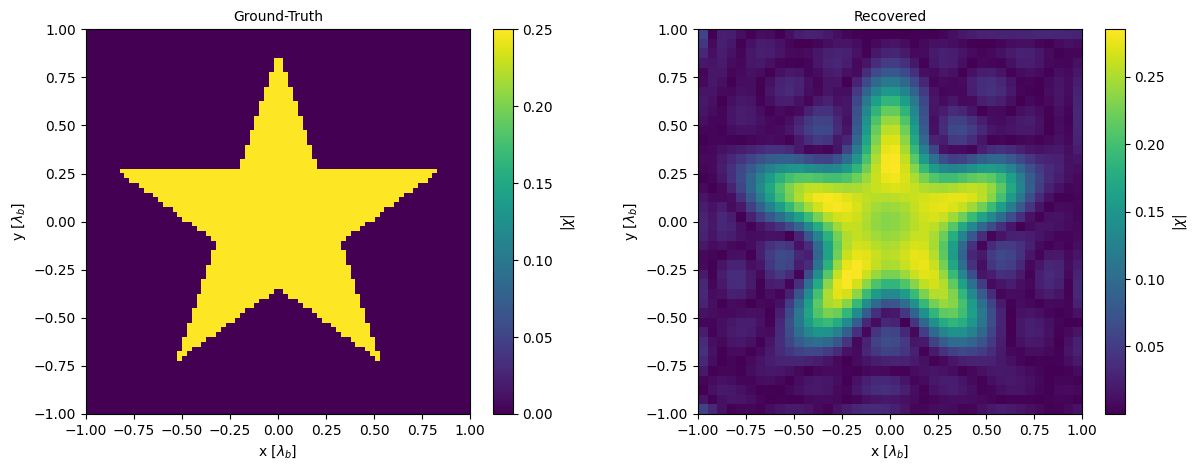

In [8]:
import dbim

stop_criteria = stp.StopCriteria(max_iterations=3)

regularization = reg.Tikhonov(0.002)

method = dbim.DistortedBornIterativeMethod(mom.MoM_CG_FFT(), regularization, stop_criteria)

result = method.solve(test, discretization=discretization)

result.plot_map(show=True, groundtruth=test)

Method: Contrast Source Inversion
Alias: csi
Input Data: star.ipt
Discretization: Richmond Method (40x40)
Method of Moments - CG-FFT (iterations=5000, tolerance=1.0e-03)
Stop Criteria
Maximum number of iterations: 300
Iteration: 1 -  Shape: 32.91, Position: 0.08,
Iteration: 2 -  Shape: 32.67, Position: 0.03,
Iteration: 3 -  Shape: 32.67, Position: 0.03,
Iteration: 4 -  Shape: 32.67, Position: 0.03,
Iteration: 5 -  Shape: 32.25, Position: 0.03,
Iteration: 6 -  Shape: 32.55, Position: 0.09,
Iteration: 7 -  Shape: 32.37, Position: 0.10,
Iteration: 8 -  Shape: 32.13, Position: 0.16,
Iteration: 9 -  Shape: 32.01, Position: 0.17,
Iteration: 10 -  Shape: 31.77, Position: 0.24,
Iteration: 20 -  Shape: 30.34, Position: 0.25,
Iteration: 30 -  Shape: 28.66, Position: 0.15,
Iteration: 40 -  Shape: 27.58, Position: 0.16,
Iteration: 50 -  Shape: 26.74, Position: 0.27,
Iteration: 60 -  Shape: 26.26, Position: 0.19,
Iteration: 70 -  Shape: 25.54, Position: 0.23,
Iteration: 80 -  Shape: 25.66, Position

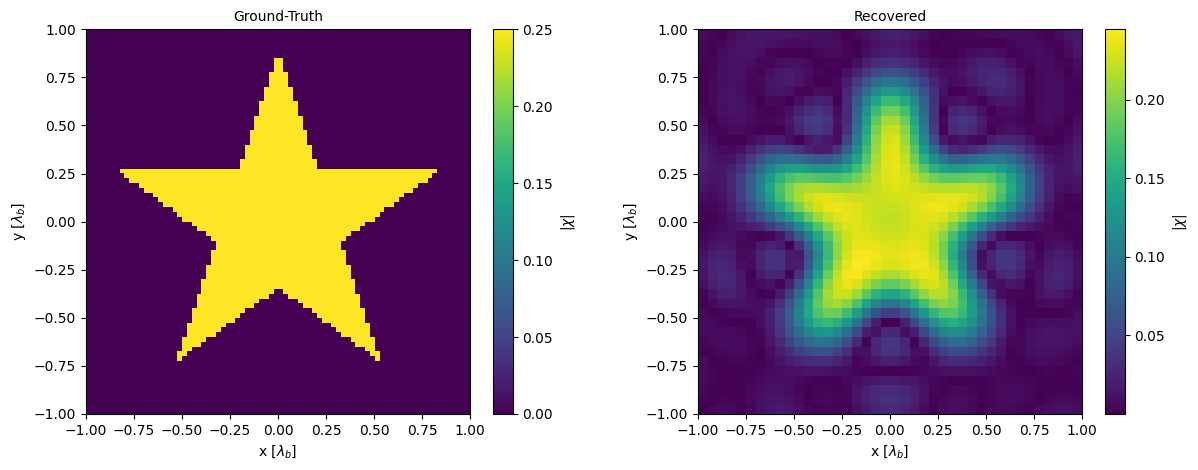

In [9]:
import csi

stop_criteria = stp.StopCriteria(max_iterations=300)

method = csi.ContrastSourceInversion(stop_criteria)

result = method.solve(test, discretization=discretization)

result.plot_map(show=True, groundtruth=test)

Method: Subspace-based Optimization Method
Alias: som
Input Data: star.ipt
Discretization: Richmond Method (40x40)
Method of Moments - CG-FFT (iterations=5000, tolerance=1.0e-03)
Stop Criteria
Maximum number of iterations: 30
Iteration: 1 -  Shape: 25.18, Position: 0.33,
Iteration: 2 -  Shape: 21.28, Position: 0.01,
Iteration: 3 -  Shape: 20.14, Position: 0.12,
Iteration: 4 -  Shape: 18.76, Position: 0.05,
Iteration: 5 -  Shape: 17.87, Position: 0.27,
Iteration: 6 -  Shape: 16.55, Position: 0.33,
Iteration: 7 -  Shape: 16.07, Position: 0.40,
Iteration: 8 -  Shape: 15.83, Position: 0.52,
Iteration: 9 -  Shape: 15.65, Position: 0.57,
Iteration: 10 -  Shape: 15.59, Position: 0.53,
Iteration: 20 -  Shape: 16.13, Position: 0.44,
Iteration: 30 -  Shape: 16.25, Position: 0.45,


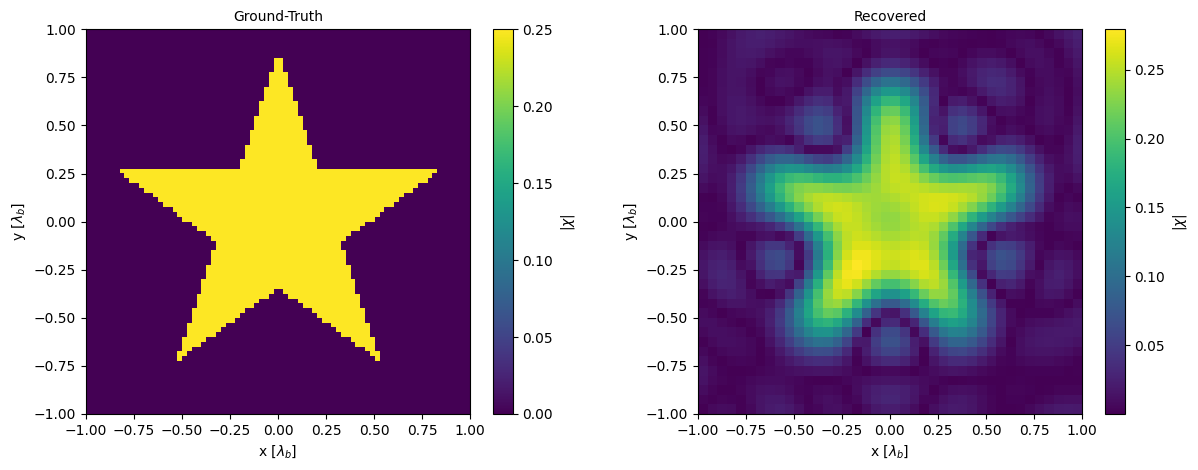

In [11]:
import som

stop_criteria = stp.StopCriteria(max_iterations=30)

method = som.SubspaceBasedOptimizationMethod(stop_criteria, cutoff_index=5)

result = method.solve(test, discretization=discretization)

result.plot_map(show=True, groundtruth=test)

In [ ]:
test.save(file_path='./data/')

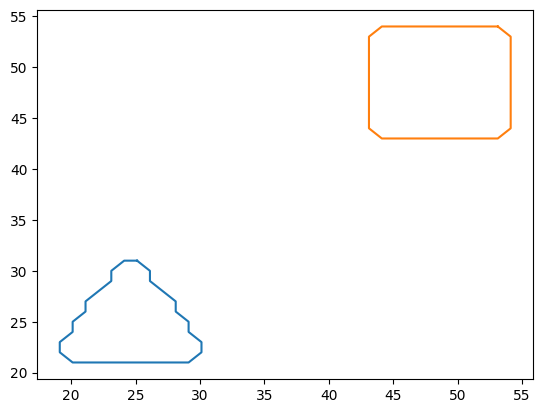

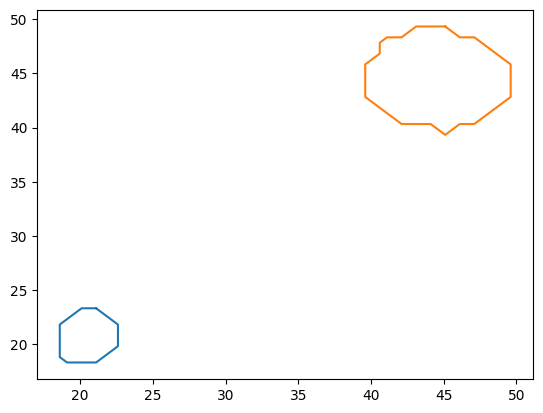

In [ ]:
# Indicador não serve para cenários de superfície (função contraste que não é 
# contínua por partes).

import numpy as np
from skimage import measure
from matplotlib import pyplot as plt

chi_o = cfg.get_contrast_map(epsilon_r=test.rel_permittivity,
                             configuration=config)
chi_r = cfg.get_contrast_map(epsilon_r=result.rel_permittivity,
                             configuration=config)

# Pega o valor absoluto para considerar permissividade e condutividade
# ao mesmo tempo
Xo, Xr = np.abs(chi_o), np.abs(chi_r)

# Para poder estimar o contorno dos objetos, é necessário estipular um limiar 
# para delimitar o objeto reconstruído. Isso é feito com base na diferença entre
# o contraste máximo e o mínimo do objeto reconstruído (50% da diferença).
# É uma heurística que serve tranquilamente para métodos qualitativos e
# cenários com espalhadores únicos. Mas pode falhar com casos com múltiplos
# espalhadores de diferentes contrastes.
threshold = (np.amin(np.abs(Xr)) + .5*(np.amax(np.abs(Xr))-np.amin(np.abs(Xr))))

# Encontra os contornos dos objetos. No caso da imagem original, tudo que 
# estiver acima de zero é considerado objeto. No caso da imagem reconstruída,
# tudo que estiver acima do limiar é considerado objeto.
co = measure.find_contours(Xo, .0, fully_connected='high')
cr = measure.find_contours(Xr, threshold)

# Converte as coordenadas dos contornos para as dimensões da imagem original.
# As coordenadas estão no intervalo dos número de pixels da imagem original.
for i in range(len(cr)):
    cr[i][:, 1] = Xo.shape[1]*cr[i][:, 1]/Xr.shape[1]
    cr[i][:, 0] = Xo.shape[0]*cr[i][:, 0]/Xr.shape[0]

# Máscaras que indicam o que é e o que não é objeto (boolean).
masko = np.zeros(Xo.shape, dtype=bool)
maskr = np.zeros(Xr.shape, dtype=bool)

# Critérios para considerar o que é e o que não é objeto.
masko[Xo > 0] = True
maskr[Xr >= threshold] = True

# Se não tiver nenhum objeto, o erro é 100%.
if np.sum(maskr*Xr) == 0:
    # return 100.
    pass

# Coordenadas dos pixels da imagem original e reconstruída.
xo, yo = np.meshgrid(np.arange(0, Xo.shape[1]), np.arange(0, Xo.shape[0]))
xr, yr = np.meshgrid(np.linspace(0, Xo.shape[1]-1, Xr.shape[1]),
                     np.linspace(0, Xo.shape[0]-1, Xr.shape[0]))

# Centro de contraste das imagens. No caso de objetos singulares, é o centro
# de contraste do objeto. No caso de múltiplos objetos, é o centro de contraste
# com todo mundo junto.
# Isso pode ocasionar em mais erros para objetos múltiplos. Uma saída seria 
# identificar quais contornos dos mesmos objetos. O problema é objetos vazados
# ou reconstruções vazadas, as quais tem dois contornos. Então eu preferi
# possibilitar objetos vazados ao invés de ter um indicador mais adaptado 
# para objetos múltiplos.
xco = np.sum(masko*xo)/np.sum(masko)
yco = np.sum(masko*yo)/np.sum(masko)
xcr = np.sum(maskr*xr)/np.sum(maskr)
ycr = np.sum(maskr*yr)/np.sum(maskr)

# Joga os contornos para o centro da imagem.
for i in range(len(co)):
    co[i][:, 0] = co[i][:, 0]-yco+Xo.shape[0]/2
    co[i][:, 1] = co[i][:, 1]-xco+Xo.shape[1]/2
    plt.plot(co[i][:, 1], co[i][:, 0])
plt.show()

# Joga os contornos para o centro da imagem.
for i in range(len(cr)):
    cr[i][:, 0] = cr[i][:, 0]-ycr+Xo.shape[0]/2
    cr[i][:, 1] = cr[i][:, 1]-xcr+Xo.shape[1]/2
    plt.plot(cr[i][:, 1], cr[i][:, 0])
plt.show()

masko = np.zeros(Xo.shape, dtype=bool)
counter = np.zeros(Xo.shape)
for i in range(len(co)):
    maskt = measure.grid_points_in_poly(Xo.shape, co[i])
    counter[maskt] += 1
masko[np.mod(counter, 2) == 1] = True

# plt.imshow(masko)
# plt.show()

maskr = np.zeros(Xo.shape, dtype=bool)
counter = np.zeros(Xo.shape)
for i in range(len(cr)):
    maskt = measure.grid_points_in_poly(Xo.shape, cr[i])
    counter[maskt] += 1
maskr[np.mod(counter, 2) == 1] = True

# plt.imshow(maskr)
# plt.show()

    # # Xor operation
    # diff = np.logical_xor(masko, maskr)

    # # Area of the difference
    # area_diff = np.sum(diff)/np.sum(masko)*100

In [4]:
import casestudy as cst

casestudy = cst.CaseStudy(import_filename='star.cst')
print(casestudy)

CASE STUDY
Name: star.cst
Method: lsm, osm, bim, csi, som
Discretization: Richmond Method (40x40)
Results: done
Test: star.ipt
Save stochastic runs? no
Number of stochastic runs: 30



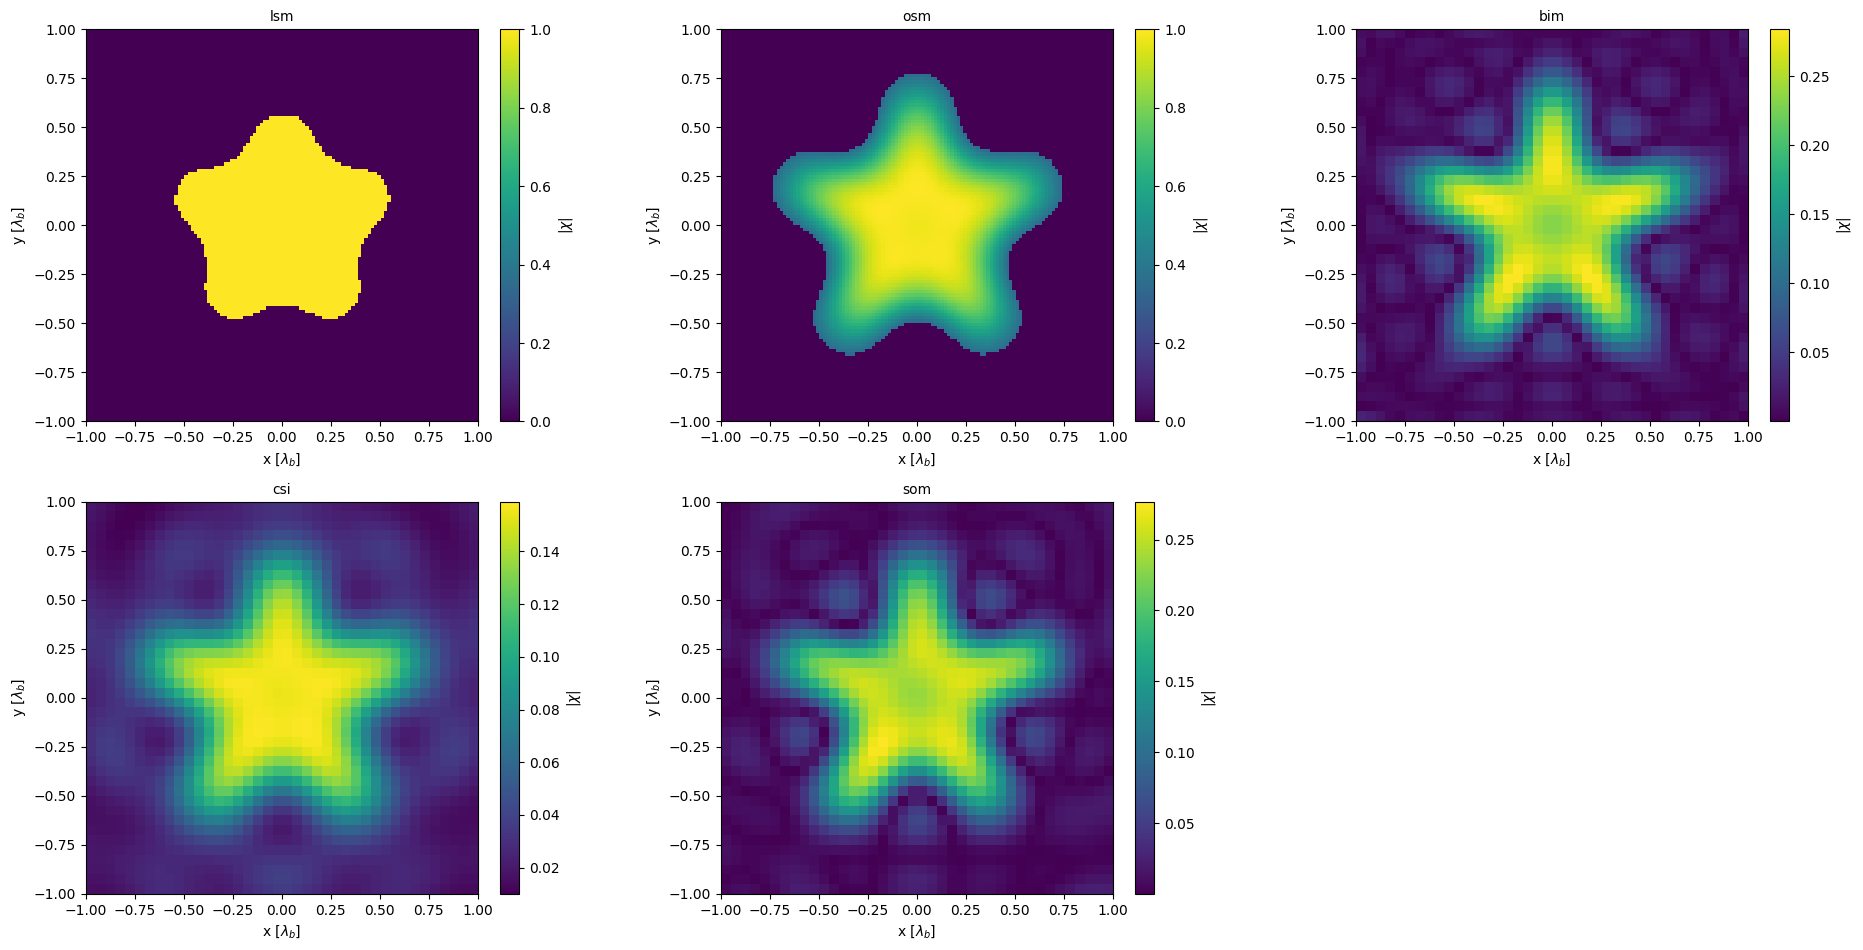

In [5]:
casestudy.reconstruction(show=True)

In [14]:
import casestudy as cst
import numpy as np

error = np.zeros(5)
for n in range(error.size):
    casestudy = cst.CaseStudy(import_filename='vary%d.cst' % n)
    error[n] = casestudy.results.zeta_s[-1]
print(error)

[ 25.07997441  29.91042866  36.74024312  51.1356366  104.78246961]
